# Convolutional Neural Networks for CIFAR-10 Image Classification

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1vkKRHpJxgT1I18EfH749J-8oLEg6Y5nl)

## Project Overview

Implementation and comparative analysis of multiple Convolutional Neural Network architectures using Keras/TensorFlow for CIFAR-10 image classification. This project demonstrates advanced deep learning concepts including convolutional layers, regularization techniques, batch normalization, and systematic architectural comparison for computer vision tasks.

## Contributors
- Abolfazl Ranjbar - [GitHub](https://github.com/ImRanjbar)
- Miaad Kimiagari - [GitHub](https://github.com/Miaad2004)
- Taha Najaf - [GitHub](https://github.com/taha-najaf)

## Objectives

- Implement baseline CNN architecture with convolutional and pooling layers
- Apply advanced regularization techniques (Dropout, L2, Batch Normalization)
- Develop deep CNN architectures with multiple convolutional blocks
- Conduct systematic comparison of different CNN configurations
- Evaluate performance using comprehensive metrics and visualization
- Demonstrate best practices in CNN training and optimization

## Technical Architecture

**Base CNN**: Conv2D → MaxPooling → Conv2D → MaxPooling → Dense layers  
**Regularized CNN**: L2 regularization + Batch Normalization + Dropout  
**Deep CNN**: Multiple convolutional blocks with progressive feature extraction  
**Optimization**: Adam optimizer with early stopping and model checkpointing  
**Evaluation**: Accuracy, loss metrics, confusion matrices, and visual predictions  
**Implementation**: Keras/TensorFlow high-level API with systematic experimentation

## Dataset Preparation for Computer Vision

Loading and preprocessing CIFAR-10 dataset for convolutional neural network training. The preprocessing maintains spatial structure (32×32×3) for convolutional operations while normalizing pixel values and applying one-hot encoding for multi-class classification.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print dataset shapes
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


## Baseline CNN Architecture Implementation

Construction of fundamental convolutional neural network featuring convolutional layers for feature extraction, max-pooling for spatial dimension reduction, and fully connected layers for classification. The architecture includes dropout regularization and demonstrates core CNN principles for image recognition.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    # First convolutional layer - 32 filters, 3x3 kernel, ReLU activation
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Already have this one

    # Second convolutional layer - 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Add dropout after second conv layer

    # Flatten layer
    Flatten(),

    # First fully connected layer - 128 neurons, ReLU activation
    Dense(128, activation='relu'),
    Dropout(0.5),  # Higher dropout rate for fully connected layer

    # Output layer - 10 neurons (for 10 classes), Softmax activation
    Dense(10, activation='softmax')
])
# Model summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training and Performance Monitoring

Training the baseline CNN with early stopping callback for optimal convergence and overfitting prevention. The training process includes validation split monitoring, real-time loss/accuracy visualization, and best model weight restoration for optimal performance.

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2731 - loss: 1.9601 - val_accuracy: 0.4906 - val_loss: 1.4355
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4602 - loss: 1.4931 - val_accuracy: 0.5578 - val_loss: 1.2470
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5107 - loss: 1.3575 - val_accuracy: 0.6003 - val_loss: 1.1532
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5471 - loss: 1.2633 - val_accuracy: 0.6247 - val_loss: 1.0768
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5727 - loss: 1.1941 - val_accuracy: 0.6388 - val_loss: 1.0605
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5844 - loss: 1.1717 - val_accuracy: 0.6518 - val_loss: 1.0092
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6029 - loss: 1.1238 - val_accuracy: 0.6586 - val_loss: 0.9711
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6117 - loss: 1.0899 - val_accuracy: 0

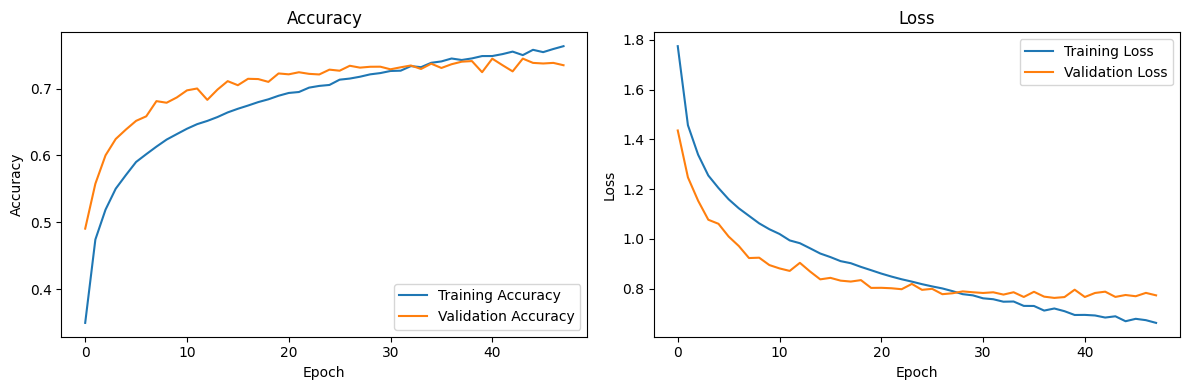

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping] # Add callback here
)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation and Prediction Visualization

Comprehensive evaluation of trained CNN on test dataset including accuracy metrics, loss assessment, and visual prediction analysis. The evaluation demonstrates model performance across all CIFAR-10 object categories with sample prediction visualizations.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7260 - loss: 0.7945
Test accuracy: 0.7290
Test loss: 0.7993
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


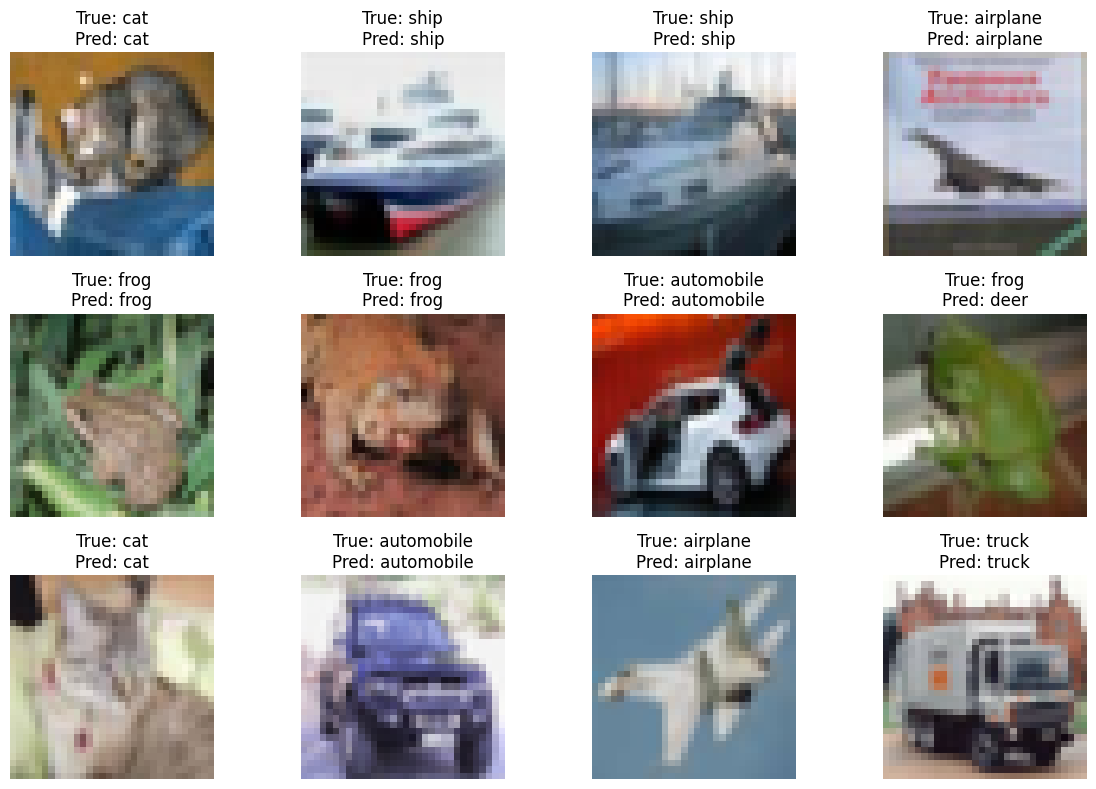

In [5]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Display some predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Advanced Regularization Techniques Implementation

Enhanced CNN architecture incorporating comprehensive regularization strategies including L2 weight regularization, batch normalization for internal covariate shift reduction, and strategic dropout placement. This implementation demonstrates advanced techniques for improving model generalization and training stability.

### Regularized CNN Architecture Construction

Implementation of advanced CNN with L2 kernel regularization, batch normalization layers, and optimized dropout strategies. The architecture separates activation functions from convolutional layers for better gradient flow and implements systematic regularization throughout the network.

In [6]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Activation
from tensorflow.keras.regularizers import l2


model_reg = Sequential([
    # First convolutional block with regularization
    Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second convolutional block with regularization
    Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fully connected layers with regularization
    Flatten(),
    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_reg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Regularized CNN Model:")
model_reg.summary()

Regularized CNN Model:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,994 (2.08 MB)

 Trainable params: 545,546 (2.08 MB)

 Non-trainable params: 448 (1.75 KB)

### Regularized Model Training with Advanced Callbacks

Training the regularized CNN with comprehensive callback system including early stopping for convergence optimization and model checkpointing for best weight preservation. The training demonstrates advanced optimization techniques and systematic performance monitoring.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create early stopping callback
early_stopping_reg = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Create model checkpoint callback to save best model
checkpoint_path = "best_reg_model.h5"
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

# Train the regularized model
print("Training Regularized CNN...")
history_reg = model_reg.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,  # Using fewer epochs for comparison
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping_reg, model_checkpoint]  # Add both callbacks
)


test_loss_reg, test_acc_reg = model_reg.evaluate(x_test, y_test, verbose=1)
print(f"Regularized CNN Test accuracy: {test_acc_reg:.4f}")


Training Regularized CNN...
Epoch 1/50
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3750 - loss: 2.1507
Epoch 1: val_loss improved from inf to 1.97021, saving model to best_reg_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3759 - loss: 2.1474 - val_accuracy: 0.4507 - val_loss: 1.9702
Epoch 2/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5487 - loss: 1.5572
Epoch 2: val_loss improved from 1.97021 to 1.49561, saving model to best_reg_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5487 - loss: 1.5570 - val_accuracy: 0.5650 - val_loss: 1.4956
Epoch 3/50
612/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6005 - loss: 1.4052
Epoch 3: val_loss improved from 1.49561 to 1.45874, saving model to best_reg_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6006 - loss: 1.4051 - val_accuracy: 0.5651 - val_loss: 1.4587
Epoch 4/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6258 - loss: 1.3481
Epoch 4: val_loss did not improve from 1.45874
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6258 - loss: 1.3481 - val_accuracy: 0.5546 - val_loss: 1.4886
Epoch 5/50
617/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6370 - loss: 1.3198
Epoch 5: val_loss improved from 1.45874 to 1.32323, saving model to best_reg_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6370 - loss: 1.3199 - val_accuracy: 0.6424 - val_loss: 1.3232
Epoch 6/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6528 - loss: 1.3006
Epoch 6: val_loss improved from 1.32323 to 1.25862, saving model to best_reg_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6528 - loss: 1.3006 - val_accuracy: 0.6537 - val_loss: 1.2586
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6646 - loss: 1.2846
Epoch 7: val_loss did not improve from 1.25862
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6646 - loss: 1.2846 - val_accuracy: 0.6218 - val_loss: 1.3870
Epoch 8/50
616/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6677 - loss: 1.2752
Epoch 8: val_loss did not improve from 1.25862
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6676 - loss: 1.2754 - val_accuracy: 0.6506 - val_loss: 1.3113
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6792 - loss: 1.2621
Epoch 9: val_loss did not improve from 1.25862
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6791 - loss: 1.2621 - val_accuracy: 0.5668 - val_loss: 1.6545
Epoch 10/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6883 - loss: 1.2521
Epoch 10: val_loss did not improve from 1.2586

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7068 - loss: 1.2263 - val_accuracy: 0.7031 - val_loss: 1.2573
Epoch 16/50
613/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7170 - loss: 1.2177
Epoch 16: val_loss did not improve from 1.25728
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7167 - loss: 1.2183 - val_accuracy: 0.6501 - val_loss: 1.3746
Epoch 17/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7127 - loss: 1.2144
Epoch 17: val_loss did not improve from 1.25728
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7126 - loss: 1.2146 - val_accuracy: 0.6737 - val_loss: 1.3208
Epoch 18/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7109 - loss: 1.2250
Epoch 18: val_loss did not improve from 1.25728
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7109 - loss: 1.2251 - val_accuracy: 0.6823 - val_loss: 1.2970
Epoch 19/50
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: 1.2154
Epoch 19: val_loss did not improve from 

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7140 - loss: 1.2072 - val_accuracy: 0.7285 - val_loss: 1.1878
Epoch 22/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7234 - loss: 1.2047
Epoch 22: val_loss did not improve from 1.18782
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7234 - loss: 1.2049 - val_accuracy: 0.4886 - val_loss: 2.0261
Epoch 23/50
617/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7199 - loss: 1.2070
Epoch 23: val_loss did not improve from 1.18782
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7198 - loss: 1.2073 - val_accuracy: 0.7230 - val_loss: 1.2109
Epoch 24/50
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7156 - loss: 1.2136
Epoch 24: val_loss did not improve from 1.18782
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7155 - loss: 1.2139 - val_accuracy: 0.6807 - val_loss: 1.3279
Epoch 25/50
615/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7245 - loss: 1.2023
Epoch 25: val_loss did not improve from 

## Deep CNN Architecture Development

Construction of advanced deep convolutional neural network with multiple convolutional blocks, progressive feature extraction, and increased network capacity. The architecture demonstrates hierarchical feature learning with systematic depth increase and optimized computational efficiency.

In [8]:
# Create a deeper CNN model
model_deep = Sequential([
    # First convolutional block
    Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fully connected layers
    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_deep.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Deep CNN Model:")
model_deep.summary()

Deep CNN Model:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 668,842 (2.55 MB)

 Trainable params: 667,690 (2.55 MB)

 Non-trainable params: 1,152 (4.50 KB)

### Confusion Matrix Analysis and Classification Performance

Detailed classification performance analysis using confusion matrix visualization to understand model behavior across all CIFAR-10 object categories. The analysis provides insights into class-specific prediction accuracy and potential misclassification patterns.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


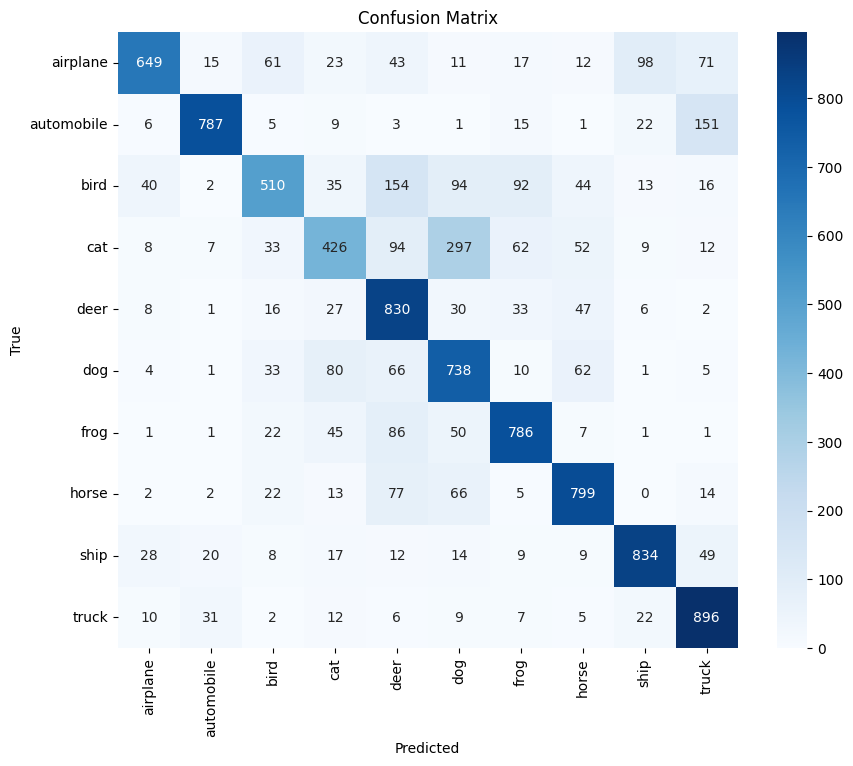

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# After model evaluation
y_pred = model_reg.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Deep CNN Training and Performance Assessment

Training the deep CNN architecture with optimized epoch count for computational efficiency while maintaining performance. The training demonstrates the capability of deeper networks for complex feature extraction and improved classification accuracy.

In [10]:
# Train the deep model
print("Training Deep CNN...")
history_deep = model_deep.fit(
    x_train, y_train,
    batch_size=64,
    epochs=30,  # Using fewer epochs for comparison
    validation_split=0.2,
    verbose=1
)

# Evaluate deep model
test_loss_deep, test_acc_deep = model_deep.evaluate(x_test, y_test, verbose=1)
print(f"Deep CNN Test accuracy: {test_acc_deep:.4f}")

Training Deep CNN...
Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3565 - loss: 1.8728 - val_accuracy: 0.5817 - val_loss: 1.1738
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5862 - loss: 1.1626 - val_accuracy: 0.6779 - val_loss: 0.9111
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6652 - loss: 0.9509 - val_accuracy: 0.7215 - val_loss: 0.7955
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6978 - loss: 0.8540 - val_accuracy: 0.7099 - val_loss: 0.8141
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7295 - loss: 0.7763 - val_accuracy: 0.7270 - val_loss: 0.7647
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7420 - loss: 0.7322 - val_accuracy: 0.7423 - val_loss: 0.7289
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7548 - loss: 0.6843 - val_accuracy: 0.7676 - val_loss: 0.6655
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7768 - loss: 

## Comprehensive CNN Architecture Comparison

Systematic comparison of all three CNN architectures (Baseline, Regularized, Deep) using accuracy and loss metrics. The comparative analysis demonstrates the impact of different architectural choices and regularization techniques on model performance and generalization capability.


MODEL COMPARISON RESULTS
Base CNN        - Accuracy: 0.7290, Loss: 0.7993
Regularized CNN - Accuracy: 0.7255, Loss: 1.1969
Deep CNN        - Accuracy: 0.8137, Loss: 0.5832


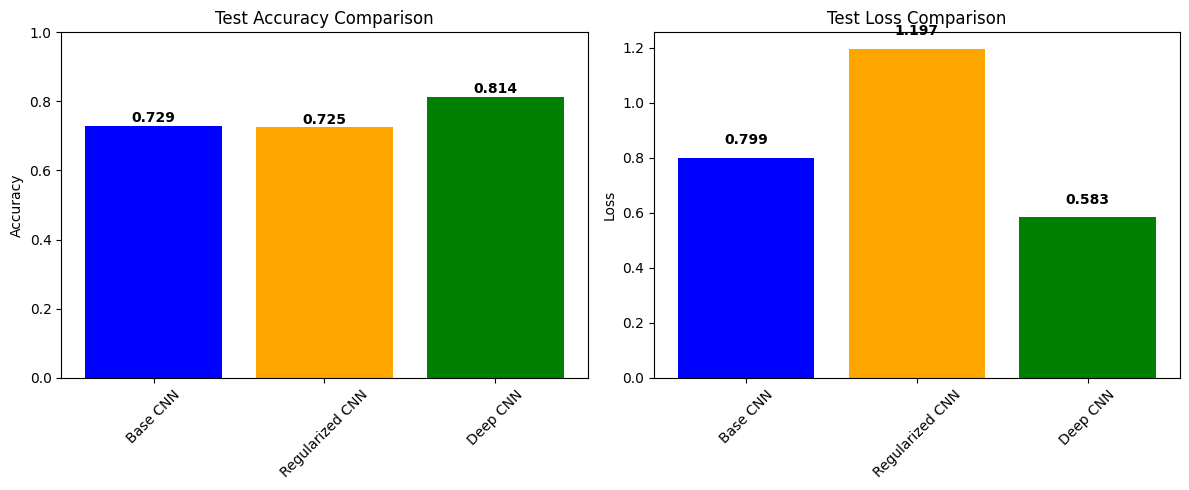

In [11]:
# Compare all models
models_comparison = {
    'Base CNN': {'model': model, 'accuracy': test_acc, 'loss': test_loss},
    'Regularized CNN': {'model': model_reg, 'accuracy': test_acc_reg, 'loss': test_loss_reg},
    'Deep CNN': {'model': model_deep, 'accuracy': test_acc_deep, 'loss': test_loss_deep}
}

# Print comparison results
print("\n" + "="*60)
print("MODEL COMPARISON RESULTS")
print("="*60)
for model_name, metrics in models_comparison.items():
    print(f"{model_name:15} - Accuracy: {metrics['accuracy']:.4f}, Loss: {metrics['loss']:.4f}")

# Plot comparison bar chart
plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
model_names = list(models_comparison.keys())
accuracies = [models_comparison[name]['accuracy'] for name in model_names]
bars1 = plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Loss comparison
plt.subplot(1, 2, 2)
losses = [models_comparison[name]['loss'] for name in model_names]
bars2 = plt.bar(model_names, losses, color=['blue', 'orange', 'green', 'red'])
plt.title('Test Loss Comparison')
plt.ylabel('Loss')
plt.xticks(rotation=45)
for i, v in enumerate(losses):
    plt.text(i, v + 0.05, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()